In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [60]:
df=pd.read_csv("D:\\DATASETS\\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [61]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [63]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [64]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [65]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [66]:
df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]=sc.fit_transform(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']])

In [67]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('Outcome',axis=1),df['Outcome'],test_size=0.2,random_state=56)

In [69]:
X_train.shape

(614, 8)

In [70]:
X_test.shape

(154, 8)

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [72]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [73]:
y_pred_lr=lr.predict(X_test)

In [74]:
from sklearn.metrics import accuracy_score

In [75]:
print("Accuracy of Loistic Model:",accuracy_score(y_test,y_pred_lr))

Accuracy of Loistic Model: 0.8311688311688312


In [76]:
model_svc=SVC()

In [77]:
model_svc.fit(X_train,y_train)
y_pred_svc=model_svc.predict(X_test)

In [78]:
print("Accuracy of Support Vector Classifier Model:",accuracy_score(y_test,y_pred_svc))

Accuracy of Support Vector Classifier Model: 0.8051948051948052


In [79]:
model_tree=DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=5)
model_tree.fit(X_train,y_train)
y_pred_tree=model_tree.predict(X_test)

In [80]:
print("Accuracy of Decision Tree Classifier Model:",accuracy_score(y_test,y_pred_tree))

Accuracy of Decision Tree Classifier Model: 0.7597402597402597


max_depth': None,
 'max_features': 0.2,
 'max_samples': 0.75,
 'n_estimators': 20

In [111]:
model_random=RandomForestClassifier(max_depth=None,max_features=0.2,max_samples=0.75,n_estimators=20)
model_random.fit(X_train,y_train)
y_pred_random=model_random.predict(X_test)

In [112]:
print("Accuracy of Random Forest Classifier Model:",accuracy_score(y_test,y_pred_random))

Accuracy of Random Forest Classifier Model: 0.7792207792207793


In [113]:
model_knn=KNeighborsClassifier(n_neighbors=4)
model_knn.fit(X_train,y_train)
y_pred_knn=model_knn.predict(X_test)

In [114]:
print("Accuracy of Random Forest Classifier Model:",accuracy_score(y_test,y_pred_knn))

Accuracy of Random Forest Classifier Model: 0.7987012987012987


In [85]:
scaled_columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
df[scaled_columns] = sc.inverse_transform(df[scaled_columns])

In [86]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1


In [87]:
df['Age'].value_counts().iloc[0:10]

Age
22.0    72
21.0    63
25.0    48
24.0    46
23.0    38
28.0    35
26.0    33
27.0    32
29.0    29
31.0    24
Name: count, dtype: int64

In [88]:
import random

def plot_bar(col, df):
    color_palletes = ['magma', 'viridis', 'inferno', 'cividis', 'Blues', 'Greens', 'Oranges', 'Purples', 'Reds']
    chosen_palette = random.choice(color_palletes)
    colors = sns.color_palette(chosen_palette+'_r', n_colors=10)
    df[col].value_counts().iloc[0:10].plot(kind='bar', color=colors)
    plt.xlabel(col)  
    plt.ylabel(f"Counts of {col}") 
    plt.title(f"Bar Plot of {col}")
    plt.legend(title=col)  
    plt.show()


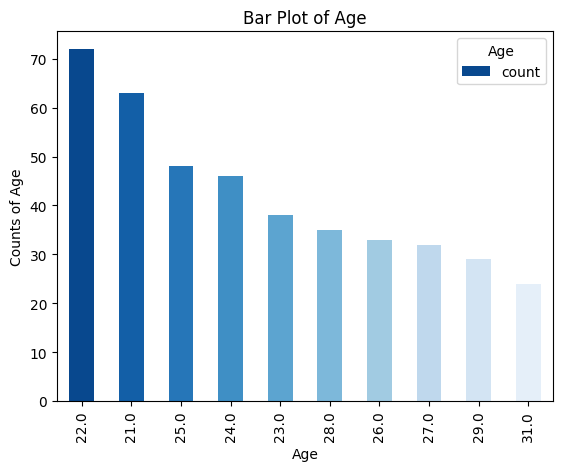

In [89]:
plot_bar('Age',df)

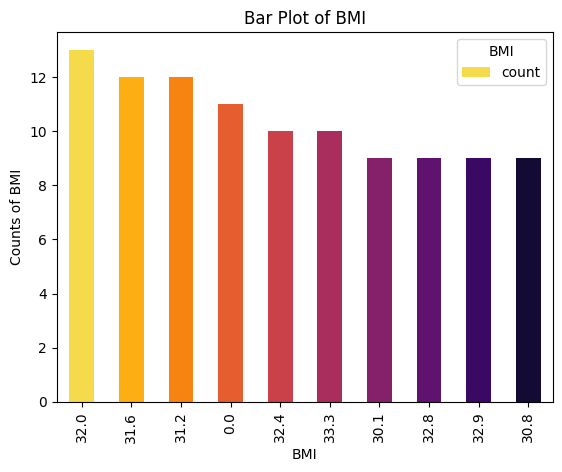

In [90]:
plot_bar('BMI',df)

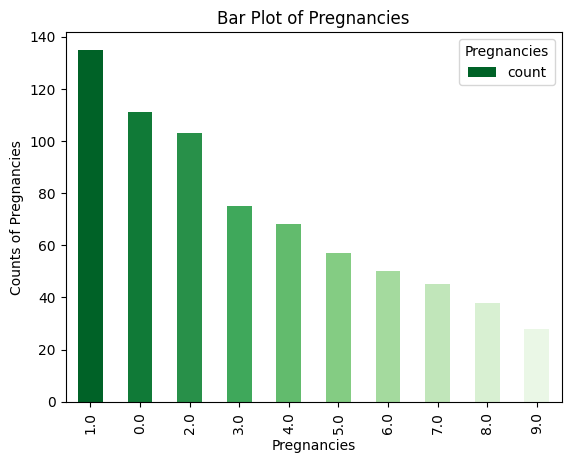

In [91]:
plot_bar('Pregnancies',df)

In [92]:
def plot_pie(col, df):
    color_palletes = ['magma', 'viridis', 'inferno', 'cividis', 'Blues', 'Greens', 'Oranges', 'Purples', 'Reds']
    chosen_palette = random.choice(color_palletes)
    colors = sns.color_palette(chosen_palette+'_r', n_colors=10)
    df[col].value_counts().iloc[0:10].plot(kind='pie',autopct='%1.1f%%',color=colors)
    plt.xlabel(col)  
    plt.ylabel(f"Counts of {col}") 
    plt.title(f"Pie Plot of {col}") 
    plt.legend(title=col) 
    plt.show()


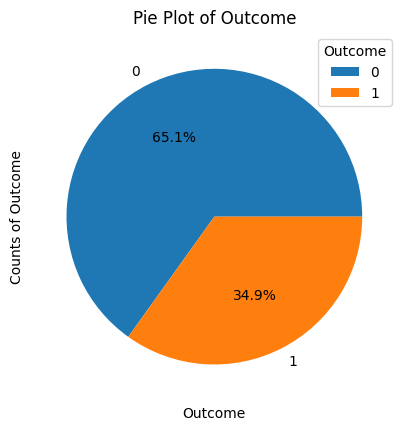

In [93]:
plot_pie('Outcome',df)

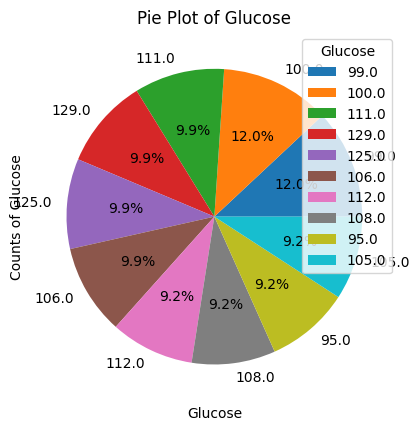

In [94]:
plot_pie('Glucose',df)

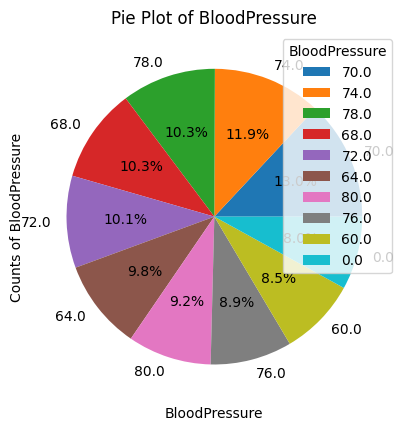

In [95]:
plot_pie('BloodPressure',df)

In [96]:
def plot_count(col1, col2, df):
    top_10_values = df[col1].value_counts().iloc[0:10].index
    
    filtered_df = df[df[col1].isin(top_10_values)]
    
    color_palletes = ['magma', 'viridis', 'inferno', 'cividis', 'Blues', 'Greens', 'Oranges', 'Purples', 'Reds']
    chosen_palette = random.choice(color_palletes)
    colors = sns.color_palette(chosen_palette + '_r', n_colors=len(top_10_values))

    sns.countplot(x=col1, hue=col2, data=filtered_df, palette=colors)
    plt.title(f"Count plot of {col1} and {col2}")
    plt.xlabel(col1)
    plt.ylabel("Count")
    plt.xticks(rotation=45)  
    plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_19100\2249608639.py:10: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x=col1, hue=col2, data=filtered_df, palette=colors)


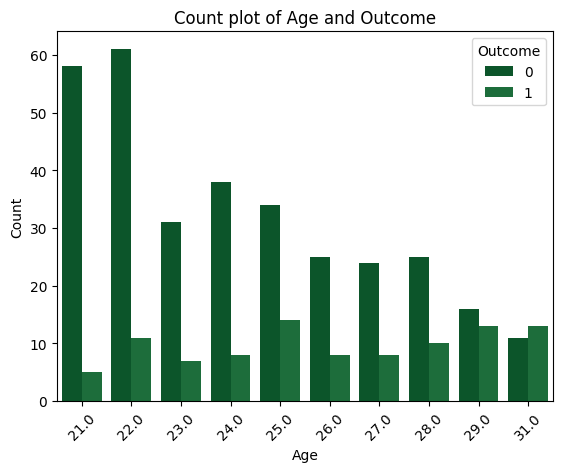

In [97]:
plot_count('Age','Outcome',df)

C:\Users\hp\AppData\Local\Temp\ipykernel_19100\2249608639.py:10: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x=col1, hue=col2, data=filtered_df, palette=colors)


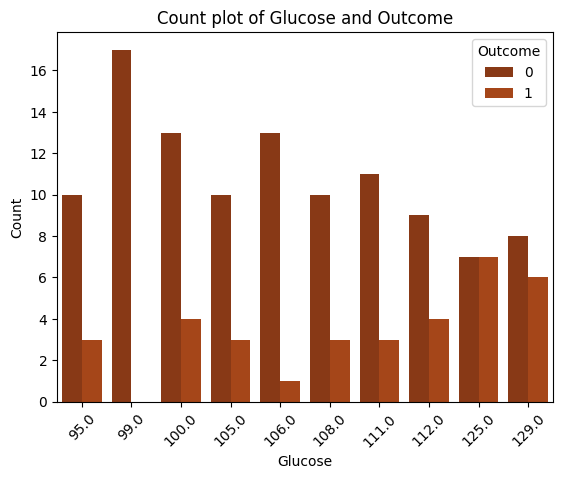

In [98]:
plot_count('Glucose','Outcome',df)

C:\Users\hp\AppData\Local\Temp\ipykernel_19100\2249608639.py:10: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x=col1, hue=col2, data=filtered_df, palette=colors)


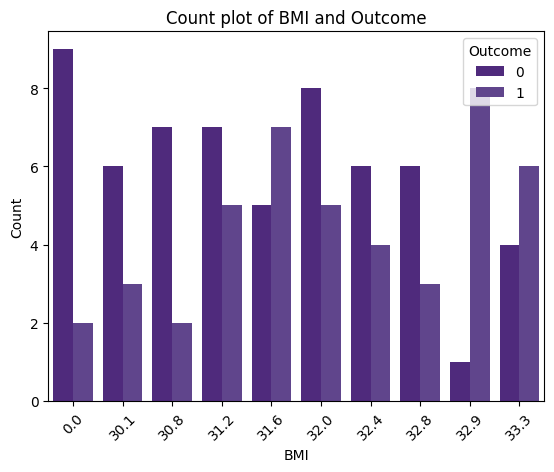

In [99]:
plot_count('BMI','Outcome',df)